Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


146/146 - 2s - 11ms/step - loss: 0.0455
Epoch 2/10
146/146 - 0s - 2ms/step - loss: 0.0166
Epoch 3/10
146/146 - 0s - 2ms/step - loss: 0.0106
Epoch 4/10
146/146 - 0s - 2ms/step - loss: 0.0061
Epoch 5/10
146/146 - 0s - 2ms/step - loss: 0.0033
Epoch 6/10
146/146 - 0s - 2ms/step - loss: 0.0022
Epoch 7/10
146/146 - 0s - 2ms/step - loss: 0.0019
Epoch 8/10
146/146 - 0s - 2ms/step - loss: 0.0019
Epoch 9/10
146/146 - 0s - 2ms/step - loss: 0.0020
Epoch 10/10
146/146 - 0s - 2ms/step - loss: 0.0019
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


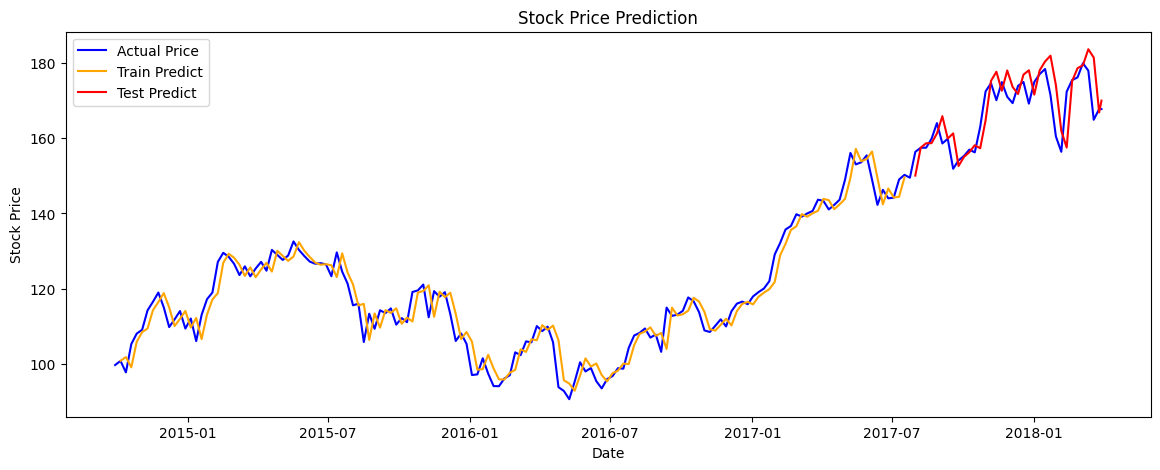

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the stock price data (replace with your dataset)
data = pd.read_csv('AAPL.csv')  # Example dataset: Apple stock prices
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data = data[['Close']]  # Use closing prices for prediction

# Data preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create training and testing datasets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Function to create dataset
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

# Create datasets
time_step = 1
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the RNN model
model = Sequential()
model.add(LSTM(50, return_sequences=False, input_shape=(X_train.shape[1], 1)))  # Single LSTM layer
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=1, verbose=2)  # Reduced epochs for simplicity

# Predicting the stock prices
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform to get actual prices
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Create a new array to hold the predictions
train_predict_plot = np.empty_like(scaled_data)
train_predict_plot[:, :] = np.nan
train_predict_plot[time_step:len(train_predict) + time_step, :] = train_predict

# Create a new array to hold the test predictions
test_predict_plot = np.empty_like(scaled_data)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (time_step * 2):len(scaled_data), :] = test_predict

# Plotting the results
plt.figure(figsize=(14, 5))
plt.plot(data.index, data['Close'], label='Actual Price', color='blue')
plt.plot(data.index, train_predict_plot, label='Train Predict', color='orange')
plt.plot(data.index, test_predict_plot, label='Test Predict', color='red')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
